In [5]:
import swmm_api as sa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

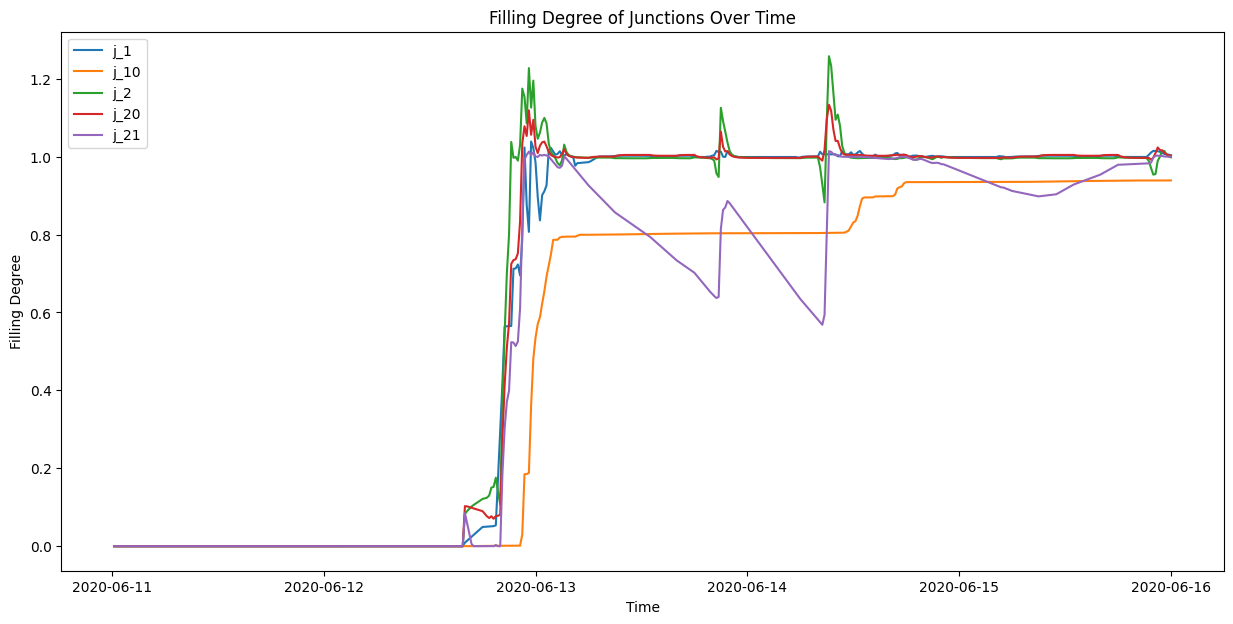

In [6]:
june = sa.read_out_file(rf'RTC\event_optimisation_input_data\Dean Town_pyswmm_1.out').to_frame()

junction_max_storage = {'j_1': 3055.37766896,
                        'j_10': 10852.4922214,
                        'j_2': 9821.97197181,
                        'j_20': 1900.3291314600003,
                        'j_21': 1163.19232848}

plt.figure(figsize=(15,7))
ax = plt.subplot(111)
for junction in junction_max_storage:
    june_filling_degre = pd.DataFrame(june['node'][junction]['volume'] / junction_max_storage[junction])
    plt.plot(pd.DataFrame(june['node'][junction]['volume'] / junction_max_storage[junction]).index, pd.DataFrame(june['node'][junction]['volume'] / junction_max_storage[junction]).values, label=junction)
    
plt.legend()
plt.xlabel('Time')
plt.ylabel('Filling Degree')
plt.title('Filling Degree of Junctions Over Time')
plt.show()

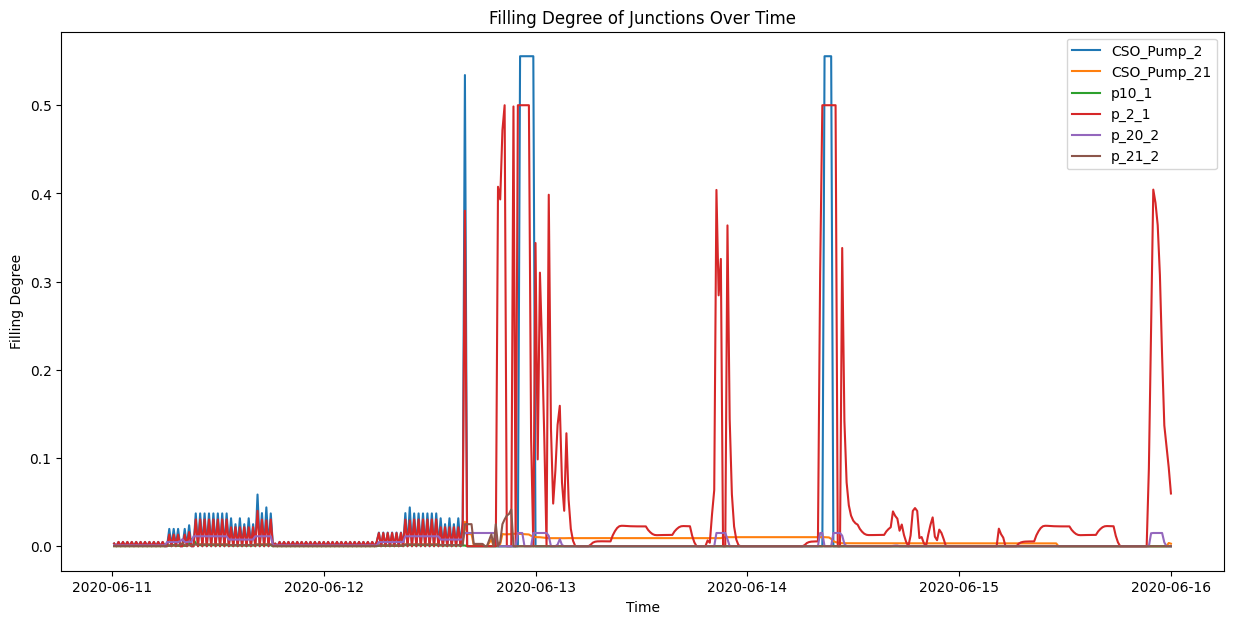

In [7]:
plt.figure(figsize=(15,7))
ax = plt.subplot(111)
for junction in ['CSO_Pump_2', 'CSO_Pump_21', 'p10_1', 'p_2_1', 'p_20_2', 'p_21_2']:
    # june_filling_degre = pd.DataFrame(june['node'][junction]['volume'] / junction_max_storage[junction])
    plt.plot(pd.DataFrame(june['link'][junction]['flow']).index, pd.DataFrame(june['link'][junction]['flow']).values, label=junction)
    
plt.legend()
plt.xlabel('Time')
plt.ylabel('Filling Degree')
plt.title('Filling Degree of Junctions Over Time')
plt.show()

In [8]:
june['link'].keys()

MultiIndex([(     'p_20_2',     'flow'),
            (     'p_20_2',    'depth'),
            (     'p_20_2', 'velocity'),
            (     'p_20_2',   'volume'),
            (     'p_20_2', 'capacity'),
            ( 'WWTP_inlet',     'flow'),
            ( 'WWTP_inlet',    'depth'),
            ( 'WWTP_inlet', 'velocity'),
            ( 'WWTP_inlet',   'volume'),
            ( 'WWTP_inlet', 'capacity'),
            (     'p_21_2',     'flow'),
            (     'p_21_2',    'depth'),
            (     'p_21_2', 'velocity'),
            (     'p_21_2',   'volume'),
            (     'p_21_2', 'capacity'),
            ('CSO_Pump_21',     'flow'),
            ('CSO_Pump_21',    'depth'),
            ('CSO_Pump_21', 'velocity'),
            ('CSO_Pump_21',   'volume'),
            ('CSO_Pump_21', 'capacity'),
            (      'p10_1',     'flow'),
            (      'p10_1',    'depth'),
            (      'p10_1', 'velocity'),
            (      'p10_1',   'volume'),
            (   